# Random Forest Model for Diabetes Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## 1. Data Acquisition

In [2]:
df = pd.read_csv("../datasets/Processed_data.csv",sep=",",index_col="PatientID")
df.shape

(15298, 18)

## 2. Data Preparation

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Split data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# Display training data shape
df_train.shape

(12238, 18)

In [6]:
# Define feature columns for clarity
feature_columns = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
                   'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

In [7]:
# Extract features and target for training data
X_train = df_train.loc[:, feature_columns].values
y_train = df_train.Diabetic.values

In [8]:
# Extract features and target for test data
X_test = df_test.loc[:, feature_columns].values
y_test = df_test.Diabetic.values

## 3. Random Forest Model Implementation

                  Feature  Importance
0             Pregnancies    0.393547
5                     BMI    0.178996
7                     Age    0.135117
4            SerumInsulin    0.100475
1           PlasmaGlucose    0.077062
3        TricepsThickness    0.041132
2  DiastolicBloodPressure    0.037220
6        DiabetesPedigree    0.036451


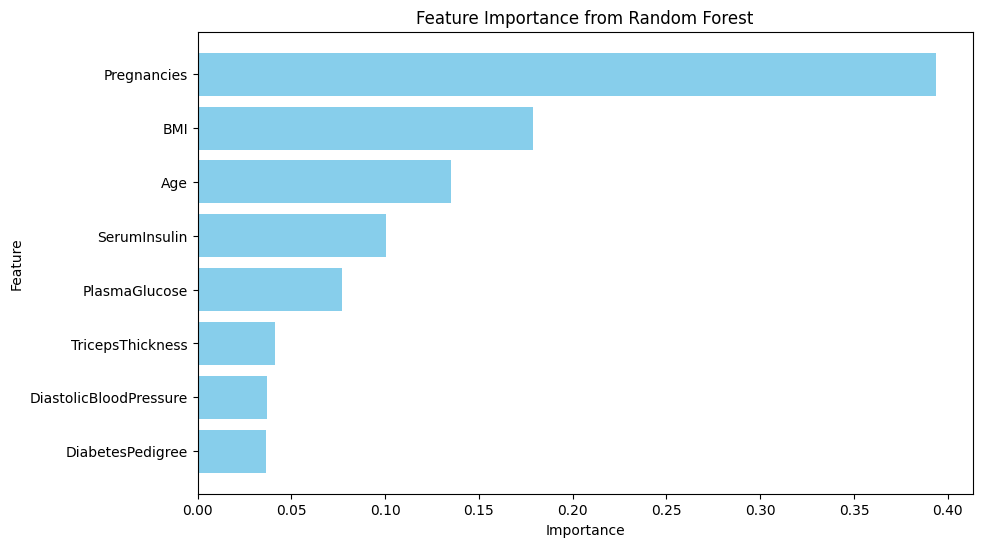

In [9]:
# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Feature importance
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

rf_model.fit(X_train, y_train)
print("Model training complete.")


# Evaluate the model on the test set
y_test_predicted = rf_model.predict(X_test)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_predicted):.4f}")

Model training complete.

Test Set Evaluation:
Accuracy: 0.9592


## 4. Model Evaluation

### 4.1 Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
# Create confusion matrix
cf = pd.DataFrame(
    columns=["y_test_0", "y_test_1"], index=["y_pred_0", "y_pred_1"]
)

cf.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_test_predicted)
cf

,y_test_0,y_test_1
y_pred_0,1481,76
y_pred_1,49,1454


### 4.2 Classification Metrics

In [13]:
from sklearn.metrics import recall_score, precision_score, classification_report

In [14]:
# Calculate recall and precision
recall = recall_score(y_true=y_test, y_pred=y_test_predicted)
precision = precision_score(y_true=y_test, y_pred=y_test_predicted)

print(f"Recall: {recall},\nPrecision: {precision}")

Recall: 0.9673985362608117,
Precision: 0.9503267973856209


In [15]:
# Generate classification report
report = classification_report(y_true=y_test, y_pred=y_test_predicted)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1557
           1       0.95      0.97      0.96      1503

    accuracy                           0.96      3060
   macro avg       0.96      0.96      0.96      3060
weighted avg       0.96      0.96      0.96      3060



## 7. Hyperparameter Tuning

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30], 
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Setup GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit grid search to the training data
grid_search.fit(X_train, y_train)

# Show best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best Cross-Validation Score: 0.9590


## 8. Final Model and Evaluation

In [17]:
# Use the best model found by GridSearchCV to make predictions
best_rf_model = grid_search.best_estimator_
final_model = best_rf_model

# Evaluate the model on the test set
y_test_predicted = best_rf_model.predict(X_test)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_predicted):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_test_predicted)}")


Test Set Evaluation:
Accuracy: 0.9631

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1557
           1       0.96      0.97      0.96      1503

    accuracy                           0.96      3060
   macro avg       0.96      0.96      0.96      3060
weighted avg       0.96      0.96      0.96      3060



In [18]:
# Saving the model
with open('../models/random_forest.pkl', 'wb') as file:
    pickle.dump(final_model, file)